In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

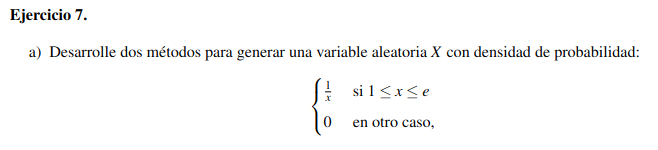

### Metodo transformada inversa

Debo encontrar su funcion de distribucion acumulada inversa. Para ello primero integro la $f_x(x)$ y queda:
$$
F(x) = \begin{cases}
        0 & \text{si } x < 1 \\
        \log(x)  & \text{si } 1 \leq x \leq e \\
        1 & \text{si } x > e
        \end{cases}

Entonces la inversa queda:
$$
F^{-1}(u) = e^u
$$ 

In [3]:
def F(x):
    if x < 1:
        return 0
    elif 1 <= x <= math.e:
        return np.log(x)
    else:
        return 1

def F_inv(u):
    return math.exp(u)

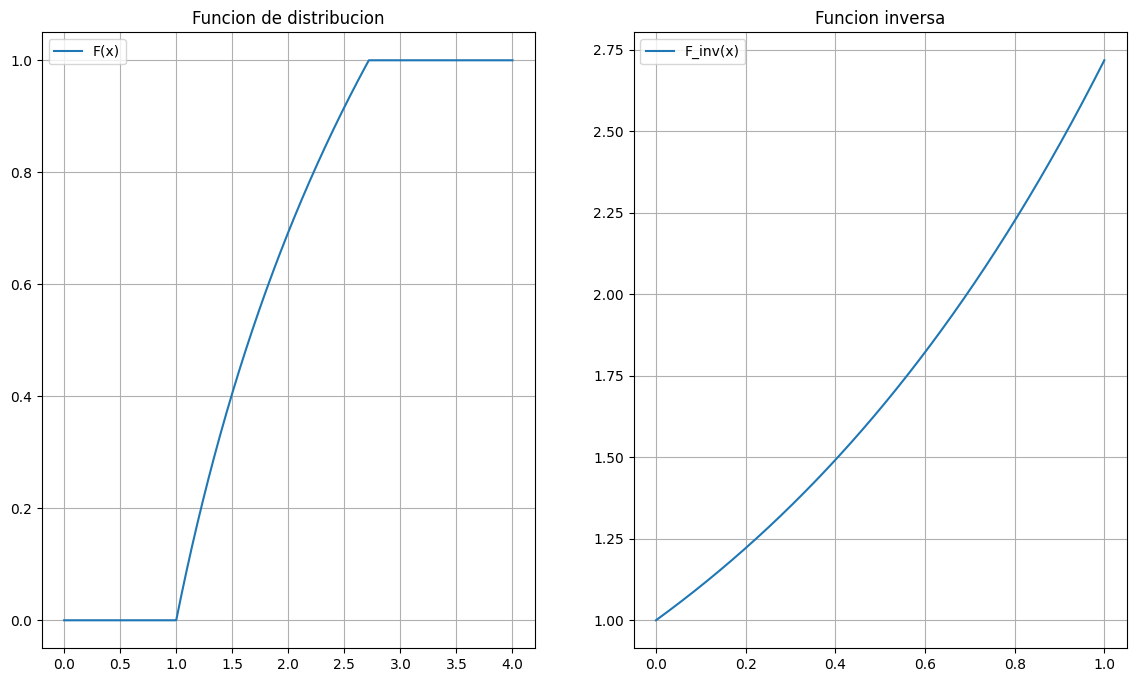

In [6]:
# grafico la Funcion de distribucion
x_arr = np.linspace(0, 4, 1000)
x_arr_inv = np.linspace(0, 1, 1000)
y_arr = [F(x) for x in x_arr]
y_inv_arr = [F_inv(x) for x in x_arr_inv]

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].plot(x_arr, y_arr, label='F(x)')
ax[0].set_title('Funcion de distribucion')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_arr_inv, y_inv_arr, label='F_inv(x)')
ax[1].set_title('Funcion inversa')
ax[1].legend()
ax[1].grid()

plt.show()

In [ ]:
def tinversa_X():
    u = rd.random()
    return F_inv(u)

### Aceptacion y rechazo contra uniforme

Debemos definir la cota c tal que $\frac{f_x(x)}{g(x)} \leq c$ donde $g(x)$ es la funcion de densidad de la variable U~U(1,e). Entonces:

$$
\frac{f_x(x)}{g(x)} = \frac{\frac{1}{x}}{\frac{1}{e-1}} \leq c  \rightarrow \frac{e-1}{x} \leq c
$$


como la funcion es decreciente, entonces toma su maximo valor cuando x = 1, entonces $c = e-1$. y ademas tenemos que 
$$
\frac{\frac{1}{x}}{e-1\frac{1}{e-1}} = \frac{1}{x} \leq 1
$$

Y el algoritmo queda:

In [ ]:
def arechazo_X():
    while True:
        y = rd.uniform(1, math.e)
        u = rd.random()
        if u < 1/y:
            return y

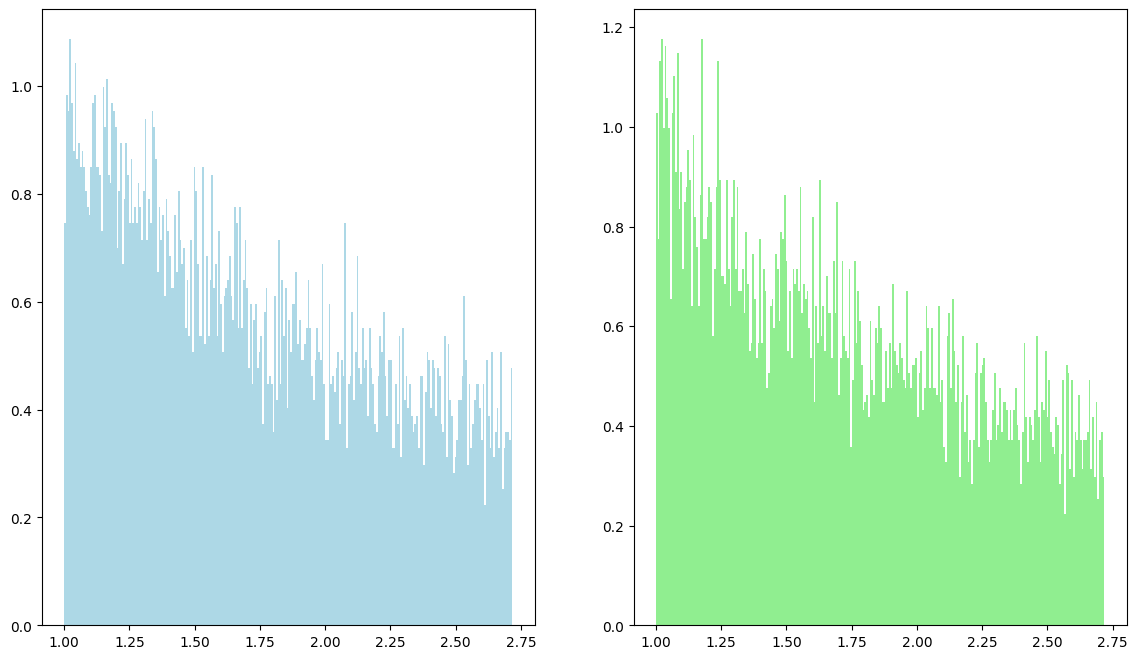

Esperanza con tinversa = 1.7221036534247116
Esperanza con arechazo = 1.721075451705105


In [ ]:
# Comparacion de los histogramas de los valores generados con ambos metodos
# histograma valores generados con el metodo de la transformada inversa
N = 10000
tinv_sim = [tinversa_X() for i in range(N)]
arech_sim = [arechazo_X() for i in range(N)]

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].hist(tinv_sim, bins=256, density=True, color='lightblue')

ax[1].hist(arech_sim, bins=256, density=True, color='lightgreen')

plt.show()

print(f"Esperanza con tinversa = {np.mean(tinv_sim)}")
print(f"Esperanza con arechazo = {np.mean(arech_sim)}")

Esperanza teorica:
$$
E(x) = \int_{1}^{e} x \frac{1}{x} dx = 1.7183
$$

Estimar la probabilidad de P(X<=2):
$$
P(X\leq 2) = F(2) = \log(2) = 0.6931
$$

In [ ]:
def simular_P_menor_x_tinv(nsims, x):
    # a partir de los valores generados por el metodo de transformada inversa
    # calculo la probabilidad de que sea menor que x
    acum = 0
    for _ in range(nsims):
        y = tinversa_X()
        if y < x:
            acum += 1
    return acum/nsims

def simular_P_menor_x_arechazo(nsims, x):
    # a partir de los valores generados por el metodo de rechazo
    # calculo la probabilidad de que sea menor que x
    acum = 0
    for _ in range(nsims):
        y = arechazo_X()
        if y < x:
            acum += 1
    return acum/nsims

In [ ]:
prob_tinv = simular_P_menor_x_tinv(10000, 2)
prob_arech = simular_P_menor_x_arechazo(10000, 2)
print(f"Probabilidad con transformada inversa = {prob_tinv}")
print(f"Probabilidad con rechazo = {prob_arech}")

Probabilidad con transformada inversa = 0.6898
Probabilidad con rechazo = 0.6899
